## Callbacks

In this tutorial we will look at callbacks, and how they can be used. For all callbacks and how to extend those see:

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



In [3]:
#Loading the dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# Create a DNN
def get_dnn_model():
    model = keras.Sequential([
       
        keras.layers.Flatten(input_shape=(28,28)), #Always use input_shape in your first layer (Makes debugging easier)
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])
    return model

dnn_model = get_dnn_model()


In [5]:
#Compile
dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train the model
history = dnn_model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/sample - loss: 2.5186 - accuracy: 0.8586 - val_loss: 0.4990 - val_accuracy: 0.8984
Epoch 2/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3644 - accuracy: 0.9127 - val_loss: 0.3391 - val_accuracy: 0.9222
Epoch 3/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2794 - accuracy: 0.9294 - val_loss: 0.3156 - val_accuracy: 0.9309
Epoch 4/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2518 - accuracy: 0.9367 - val_loss: 0.2677 - val_accuracy: 0.9339
Epoch 5/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2311 - accuracy: 0.9420 - val_loss: 0.2627 - val_accuracy: 0.9384
Epoch 6/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2173 - accuracy: 0.9456 - val_loss: 0.2443 - val_accuracy: 0.9465
Epoch 7/20
60000/60000 [==============================] 

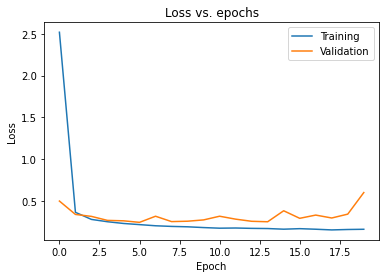

In [7]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Early stopping

The model does not much improve after about 8 epochs (and maybe even gets worse)
So we want to stop early. 

We have callbacks for this!


In [8]:
from tensorflow.keras.callbacks import EarlyStopping

dnn_model = get_dnn_model()
dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE

history = dnn_model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels), callbacks=[
     EarlyStopping(patience=2)
] ) # We get the history back

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/sample - loss: 2.2993 - accuracy: 0.8526 - val_loss: 0.5033 - val_accuracy: 0.8756
Epoch 2/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3559 - accuracy: 0.9121 - val_loss: 0.2973 - val_accuracy: 0.9264
Epoch 3/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2614 - accuracy: 0.9317 - val_loss: 0.3181 - val_accuracy: 0.9248
Epoch 4/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2264 - accuracy: 0.9405 - val_loss: 0.2512 - val_accuracy: 0.9385
Epoch 5/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2208 - accuracy: 0.9441 - val_loss: 0.2613 - val_accuracy: 0.9389
Epoch 6/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2049 - accuracy: 0.9472 - val_loss: 0.2912 - val_accuracy: 0.9360


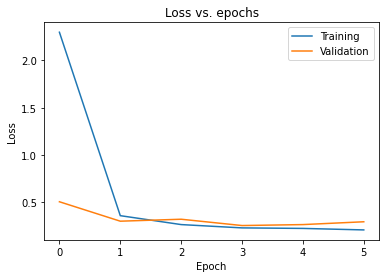

In [9]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Saving the models

Another callback is the saving models callback. This is used for saving models, handy to use in long training sequences to make sure that you have a backup of your model


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

dnn_model = get_dnn_model()
dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE

checkpoint_path = 'model_checkpoint\checkpoint_{epoch:02d}' 
checkpoint_callback = ModelCheckpoint(
                        filepath=checkpoint_path,
                        save_freq='epoch', #How often you want to save
                        verbose=1,
                        save_weights_only=True #Can be set to False (default) if you only want to save the weights and not the architecture
                    )

history = dnn_model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels), callbacks=[
     checkpoint_callback
] ) # We get the history back

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59232/60000 [============================>.] - ETA: 0s - loss: 2.7088 - accuracy: 0.8592
Epoch 00001: saving model to model_checkpoint\checkpoint_01
60000/60000 [==============================] - 3s 48us/sample - loss: 2.6819 - accuracy: 0.8593 - val_loss: 0.5164 - val_accuracy: 0.8869
Epoch 2/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.4093 - accuracy: 0.9046
Epoch 00002: saving model to model_checkpoint\checkpoint_02
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4087 - accuracy: 0.9046 - val_loss: 0.3720 - val_accuracy: 0.9209
Epoch 3/10
59168/60000 [============================>.] - ETA: 0s - loss: 0.3131 - accuracy: 0.9222
Epoch 00003: saving model to model_checkpoint\checkpoint_03
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3147 - accuracy: 0.9222 - val_loss: 0.3248 - val_accuracy: 0.9284
Epoch 4/10
58912/60000 [============================>.] 

In [11]:
dnn_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.2974 - accuracy: 0.9414


[0.2973770836174488, 0.9414]

In [16]:
#Load the model

loaded_dnn_model = get_dnn_model()
loaded_dnn_model.load_weights("model_checkpoint\checkpoint_10")
loaded_dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE


In [17]:
loaded_dnn_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.2974 - accuracy: 0.9414


[0.2973770836174488, 0.9414]

In [18]:
loaded_dnn_model.loss

## Saving the whole model

We can also save the whole model

In [19]:
# Set everything up
from tensorflow.keras.callbacks import ModelCheckpoint

dnn_model = get_dnn_model()
dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE

best_checkpoint_path = 'best_model_checkpoint' 
best_checkpoint_callback = ModelCheckpoint(
                        filepath=best_checkpoint_path,
                        save_freq='epoch', #How often you want to save
                        save_best_only=True,
                        monitor='val_accuracy',
                        verbose=1,
                        save_weights_only=False #Can be set to False (default) if you only want to save the weights and not the architecture
                    )

history = dnn_model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels), callbacks=[
     best_checkpoint_callback
] ) # We get the history back

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59872/60000 [============================>.] - ETA: 0s - loss: 2.7876 - accuracy: 0.8597
Epoch 00001: val_accuracy improved from -inf to 0.88240, saving model to best_model_checkpoint
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: best_model_checkpoint\assets
60000/60000 [==============================] - 3s 53us/sample - loss: 2.7825 - accuracy: 0.8598 - val_loss: 0.5637 - val_accuracy: 0.8824
Epoch 2/10
59488/60000 [============================>.] - ETA: 0s - loss: 0.3771 - accuracy: 0.9108
Epoch 00002: val_accuracy improved from 0.88240 to 0.90600, saving model to best_model_checkpoint
INFO:tensorflow:Assets written to: best_model_checkpoint\assets
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3759 - accuracy: 0.9111 - val_loss: 0.3774 - val_accuracy: 0.9060
Epoch 3/10
59168/60000 [============================>.] - ETA: 0s - loss

In [24]:
#use the load_model function
from tensorflow.keras.models import load_model
loaded_dnn_model = load_model("best_model_checkpoint")

In [25]:
dnn_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3185 - accuracy: 0.9471


[0.3184971558784833, 0.9471]

In [26]:
loaded_dnn_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.2737 - accuracy: 0.9471


[0.27366726149489407, 0.9471]